In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [7]:
df = pd.read_csv('F:\Git\Food-price-forecast\ModelsAndDatasets\Datasets\price_temp_grain_starch.csv')
df_train = df.loc[:287,:].drop(axis=1, columns=["Date", "Unnamed: 0"])
df_test = df.loc[288:311,:].drop(axis=1, columns=["Date", "Unnamed: 0"])

In [62]:
train_dates = pd.to_datetime(df_train['Date'])  #extract dates for x-axis for later plotting
print(train_dates.tail(15))

273   2018-10-01
274   2018-11-01
275   2018-12-01
276   2019-01-01
277   2019-02-01
278   2019-03-01
279   2019-04-01
280   2019-05-01
281   2019-06-01
282   2019-07-01
283   2019-08-01
284   2019-09-01
285   2019-10-01
286   2019-11-01
287   2019-12-01
Name: Date, dtype: datetime64[ns]


<Axes: >

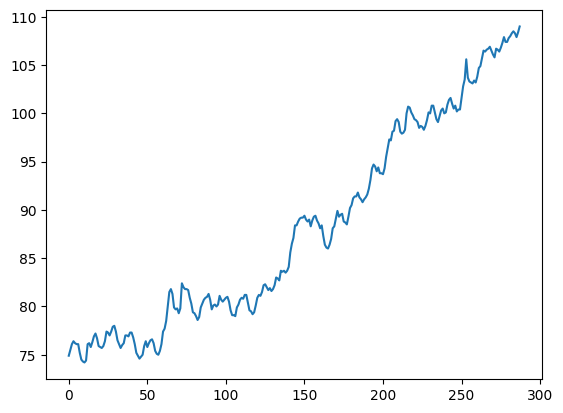

In [11]:
cols = list(df_train)[0:3]
df_for_training = df_train[cols].astype(float)
df_for_training["Food_Price"].plot()

In [12]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [13]:
n_future = 1 # wie weit in Zukunft wird vorhergesagt
n_past = 14 #Wieviele vergangene Perioden benutze ich zur Vorhersage

trainX = []
trainY = []

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
trainX.shape, trainY.shape

((274, 14, 3), (274, 1))

In [19]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mape')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29857 (116.63 KB)
Trainable params: 29857 (116.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/300
7/7 [==============================] - 2s 58ms/step - loss: 98.9690 - val_loss: 92.9965
Epoch 2/300
7/7 [==============================] - 0s 12ms/step - loss: 90.9775 - val_loss: 93.2233
Epoch 3/300
7/7 [==============================] - 0s 12ms/step - loss: 80.7174 - val_loss: 88.8696
Epoch 4/300
7/7 [==============================] - 0s 12ms/step - loss: 66.1114 - val_loss: 86.8069
Epoch 5/300
7/7 [==============================] - 0s 12ms/step - loss: 59.5302 - val_loss: 79.2732
Epoch 6/300
7/7 [==============================] - 0s 12ms/step - loss: 56.1258 - val_loss: 71.7843
Epoch 7/300
7/7 [==============================] - 0s 12ms/step - loss: 51.5944 - val_loss: 59.7189
Epoch 8/300
7/7 [==============================] - 0s 12ms/step - loss: 45.2023 - val_loss: 34.6684
Epoch 9/300
7/7 [==============================] - 0s 12ms/step - loss: 44.2835 - val_loss: 99.9451
Epoch 10/300
7/7 [==============================] - 0s 12ms/step - loss: 36.7087 - val_loss: 124.871

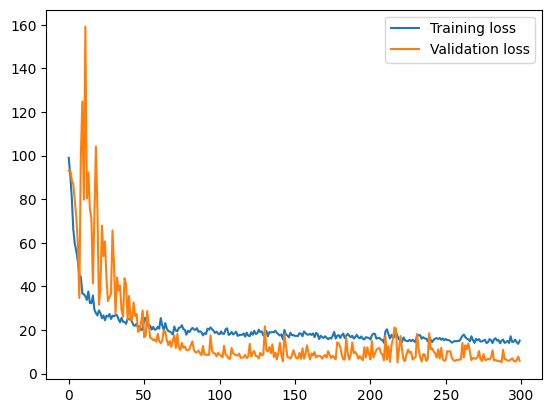

In [20]:
history = model.fit(trainX, trainY, epochs=300, batch_size=32, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [24]:
model.history.history

{'loss': [98.96900939941406,
  90.97749328613281,
  80.71737670898438,
  66.11141204833984,
  59.530216217041016,
  56.125755310058594,
  51.59437942504883,
  45.202327728271484,
  44.28352737426758,
  36.70867156982422,
  36.34356689453125,
  35.432151794433594,
  33.75722885131836,
  37.61468505859375,
  32.32566452026367,
  32.249568939208984,
  35.77785110473633,
  29.238590240478516,
  27.70598793029785,
  26.657596588134766,
  28.955249786376953,
  27.66908073425293,
  25.384252548217773,
  26.66929054260254,
  24.420671463012695,
  26.514022827148438,
  26.12534523010254,
  27.290748596191406,
  25.03540802001953,
  26.536632537841797,
  26.237916946411133,
  26.905893325805664,
  26.72551918029785,
  24.814428329467773,
  23.5369873046875,
  25.57657814025879,
  23.737058639526367,
  23.652976989746094,
  22.788835525512695,
  25.152509689331055,
  24.858503341674805,
  25.457923889160156,
  23.62566375732422,
  22.066579818725586,
  21.954561233520508,
  22.853273391723633,
  

In [76]:
n_past = 16
n_days_for_prediction=15
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

[Timestamp('2018-09-01 00:00:00'), Timestamp('2018-09-02 00:00:00'), Timestamp('2018-09-03 00:00:00'), Timestamp('2018-09-04 00:00:00'), Timestamp('2018-09-05 00:00:00'), Timestamp('2018-09-06 00:00:00'), Timestamp('2018-09-07 00:00:00'), Timestamp('2018-09-08 00:00:00'), Timestamp('2018-09-09 00:00:00'), Timestamp('2018-09-10 00:00:00'), Timestamp('2018-09-11 00:00:00'), Timestamp('2018-09-12 00:00:00'), Timestamp('2018-09-13 00:00:00'), Timestamp('2018-09-14 00:00:00'), Timestamp('2018-09-15 00:00:00')]


In [78]:
prediction = model.predict(trainX[-n_days_for_prediction:])

1/1 [==============================] - 0s 265ms/step


In [87]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [80]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_20260\1016296988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

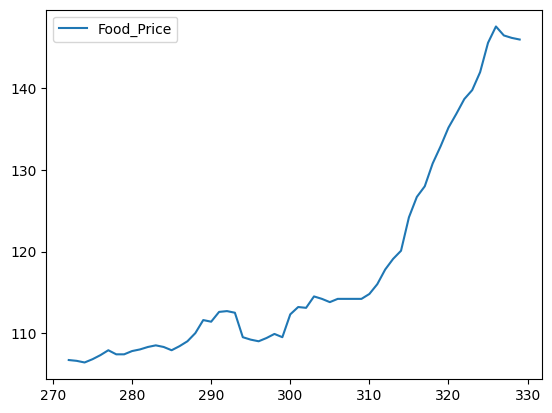

In [86]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])